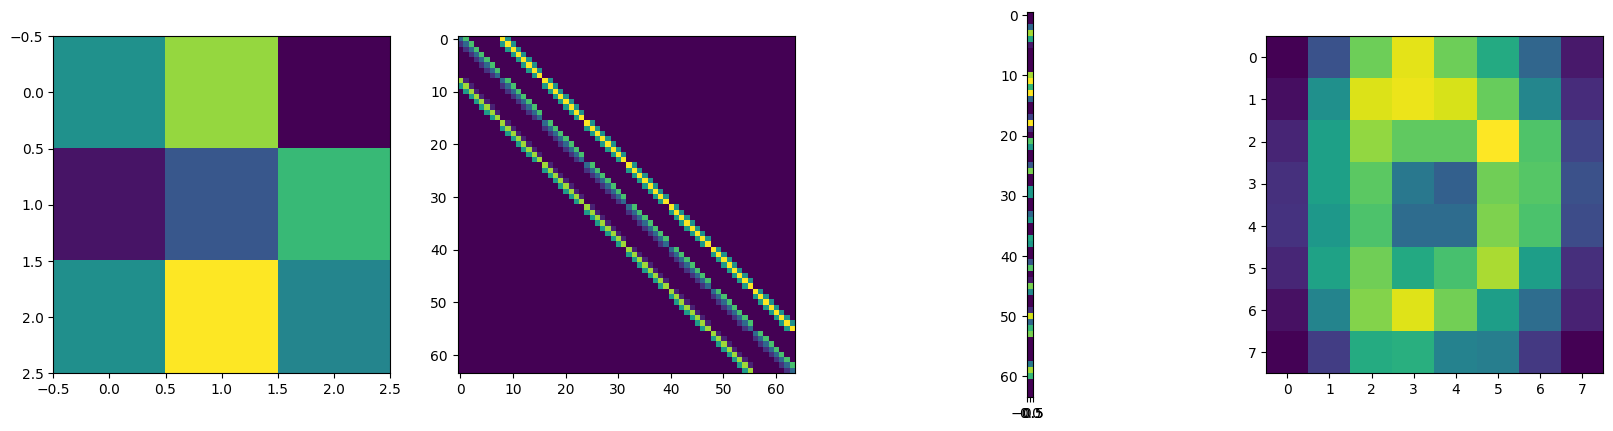

In [1]:
import torch
from utils import image_to_adj
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

torch.manual_seed(0)
np.random.seed(0)

digits, labels = load_digits(return_X_y=True)

image_size = 8
kernel_size = 3

# kernel choice 1
kernel = torch.arange(1, kernel_size+1).repeat(kernel_size, 1)
# kernel choice 2
kernel = torch.rand((kernel_size, kernel_size))
# kernel choice 3 (horizontal edge detection)
# kernel = torch.tensor([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
# kernel choice 4 (vertical edge detection)
# kernel = torch.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
# kernel =  torch.ones((3, 3))

image = torch.tensor(digits[0].reshape((image_size, image_size))).float()


fig, ax = plt.subplots(1, 4, figsize=(20, 5))
adj = image_to_adj(torch.zeros((image_size, image_size)), kernel)
ax[0].imshow(kernel)
ax[1].imshow(adj)
ax[2].imshow(image.reshape((image_size*image_size, 1)))
ax[3].imshow(torch.matmul(adj, image.reshape((image_size*image_size, 1))).reshape((image_size, image_size)))

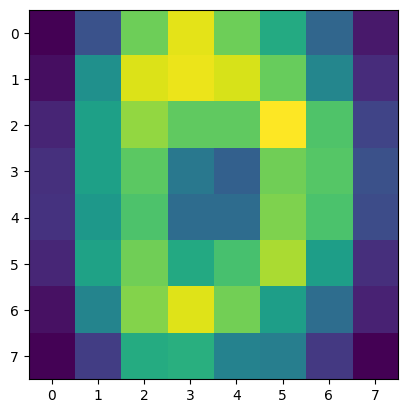

In [7]:
plt.imshow(torch.matmul(adj, image.reshape((image_size*image_size, 1))).reshape((image_size, image_size)))

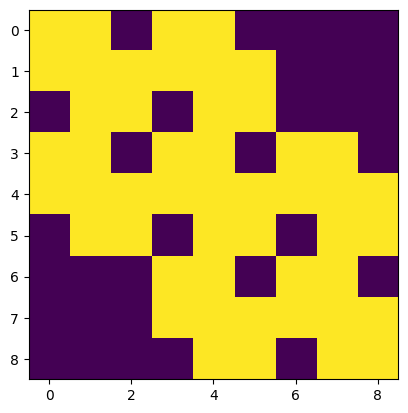

In [4]:
plt.imshow(image_to_adj(torch.zeros(3, 3)))

In [ ]:
# CSC format
# ptr = [0, 2, 5, 6, 8]
# indices = [1, 2, 0, 2, 3, 2, 1, 3]
# data = [0, 0, 1, 0, 2, 1, 2, 0] 
# blocks = [1, 2, 3]
# res = np.zeros((4, 4))
# for i in range(len(ptr)-1):
#     for j in range(ptr[i], ptr[i+1]):
#         res[i, indices[j]] = blocks[data[j]]
# plt.imshow(res)

In [230]:
# CSBR EXAMPLE
# a = [
#     [0, 1, 1, 0],
#     [1, 0, 0, 0],
#     [0, 1, 1, 1],
#     [0, 0, 1, 1]
#     ]

# for i in range(4):
#     plt.axvline(i-0.51, color='black', lw=1)
#     plt.axhline(i-0.51, color='black', lw=1)
# plt.imshow(a)
# plt.savefig("sparse_matrix.png")

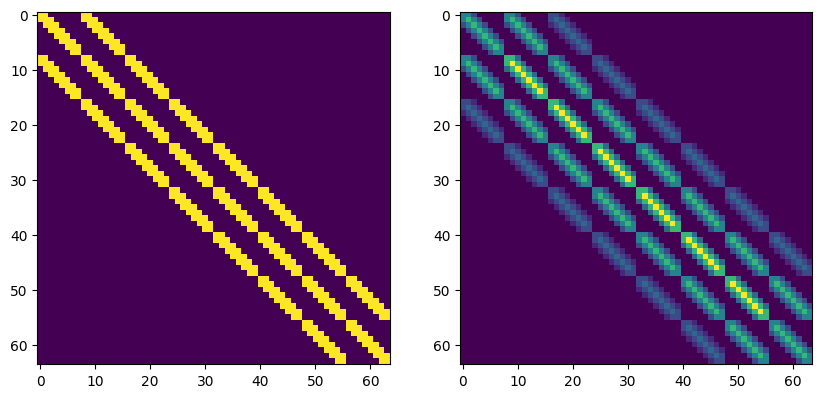

In [3]:
# expanding kernel size by raising to the power of 2
from block_sparse import SparseAdjacency
import matplotlib.pyplot as plt


image_size = 8
kernel_size = 3

sparse_A = SparseAdjacency((image_size, image_size), kernel_size=kernel_size)
extended_A = torch.matmul(sparse_A.to_dense(), sparse_A.to_dense().T)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(sparse_A.to_dense().detach().numpy())
ax[1].imshow(extended_A.detach().numpy())
# plt.savefig('sparse_adjacency_2d_grid.pdf')

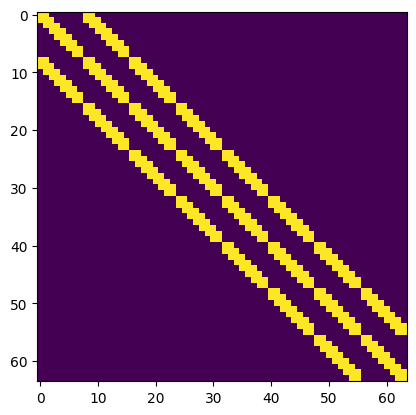

In [4]:
plt.imshow(sparse_A.to_dense().detach().numpy())

In [242]:
sparse_A.get_row(1).shape

torch.Size([3, 8, 8])

In [243]:
def get_diag_index(kernel_size, i, j):
    return j-i+kernel_size//2

[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7]
[5, 6, 7]


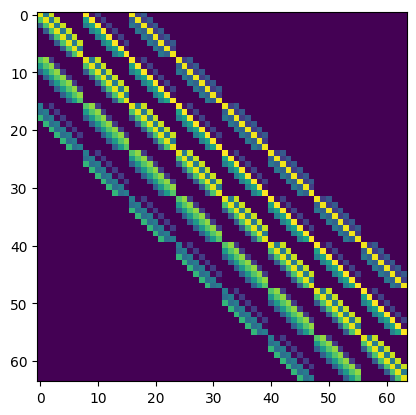

In [244]:
image_size = 8
kernel_size = 5
kernel = torch.ones((kernel_size, kernel_size))
kernel = torch.rand((kernel_size, kernel_size))
adj = image_to_adj(torch.zeros((image_size, image_size)), kernel)
plt.imshow(adj)
shape = [image_size, image_size]
ptr = []
indices = []
data = []
blocks = [torch.eye(image_size)]
for i in range(shape[0]):
    ptr.append(len(indices))
    if i < kernel_size//2:        
        indices.extend([j for j in range(kernel_size//2+1+i)])
        data.append(len(blocks))
    elif i >= shape[0]-kernel_size//2:        
        indices.extend([j for j in range(i-kernel_size//2, image_size)])
        data.append(len(blocks))
    else:        
        indices.extend([j for j in range(i-kernel_size//2, i+kernel_size//2+1)])
        data.append(len(blocks))
ptr.append(len(indices))

for i in range(len(ptr)-1):
    print(indices[ptr[i]:ptr[i+1]])

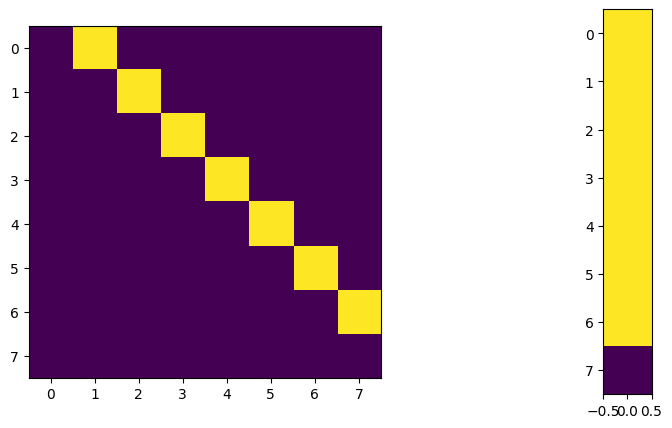

In [245]:
def get_b(image_size, i):
    b = torch.diag(torch.ones(image_size-abs(i)), i)
    # b = torch.zeros((image_size**2, image_size**2))
    # for p in pos:
    #     b[p[0]*image_size:(p[0]+1)*image_size, p[1]*image_size:(p[1]+1)*image_size] = torch.ones((image_size, image_size))

    return b

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

b = get_b(image_size, 1)
ax[0].imshow(b)

# write r on the nonzero elements of b
b = torch.matmul(b, torch.ones((image_size, 1)))

ax[1].imshow(b)

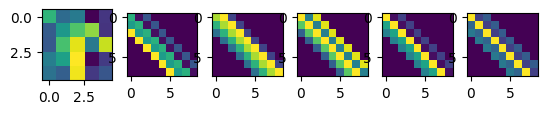

In [252]:
# creating sparse kernel blocks off of the 3x3 kernel
def get_r(image_size, row):
    # c = torch.arange(1, kernel_size+1)
    c = torch.cat((row, torch.tensor([0]*(image_size-2))))
    return torch.vstack([torch.roll(c, i, 0) for i in range(image_size)])[:, kernel_size//2:]

# c = torch.arange(1, kernel_size+1)
R = [get_r(image_size, c) for c in kernel]

fig, ax = plt.subplots(1, len(kernel)+1)
ax[0].imshow(kernel)
for i, r in enumerate(R):
    ax[i+1].imshow(r)

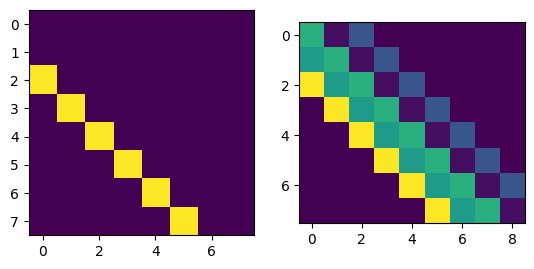

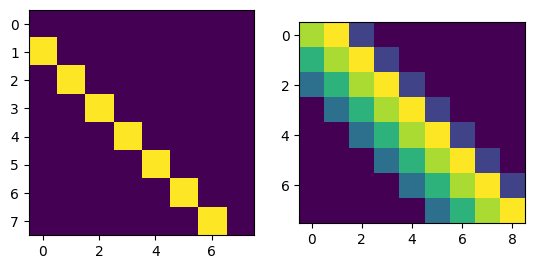

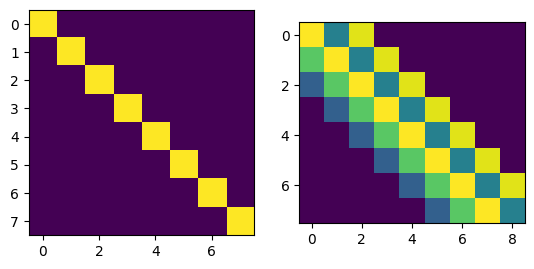

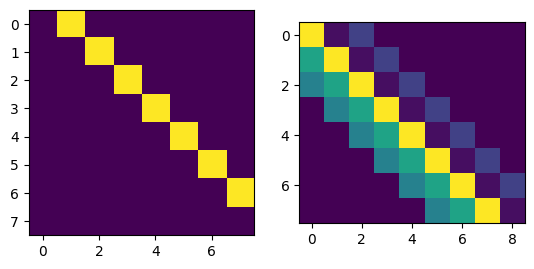

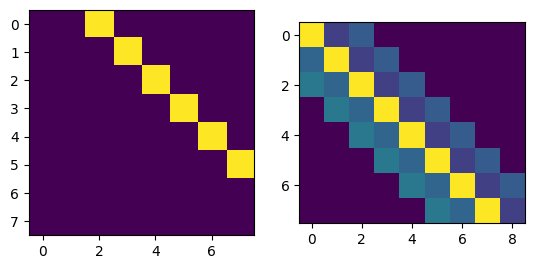

In [253]:
# iterate over the diagonal bands of the adj matrix
def get_diag_index(kernel_size, i, j):
    return j-i+kernel_size//2


i = -2
# temp = torch.diag(torch.ones(image_size-abs(i)), i)
# plt.imshow(temp)
# plt.show()
for c in range(-kernel_size//2+1, kernel_size//2+1):

    temp = torch.diag(torch.ones(image_size-abs(c)), c)
    i, j = temp.nonzero()[0]
    
    fig, ax = plt.subplots(1, 2)

    ax[0].imshow(temp)
    ax[1].imshow(R[get_diag_index(kernel_size, i, j)])
    plt.show()

In [254]:
# kernel_size=3 playground - safe to ignore
coeff = [torch.ones((2, 8, 8)), 
         torch.ones((3, 8, 8)), torch.ones((3, 8, 8)), torch.ones((3, 8, 8)), torch.ones((3, 8, 8)), torch.ones((3, 8, 8)), torch.ones((3, 8, 8)),
         torch.ones((2, 8, 8))]

X = torch.ones((8, 8, 1))
res = torch.zeros_like(X)
for i in range(len(coeff)):
    if i == 0:
        print(coeff[i].shape, X[i:i+2].shape, i, list(range(i, i+2)))
        temp = torch.matmul(coeff[i], X[i:i+2])
        temp = torch.sum(temp, dim=(0))
        res[i] = temp
    elif i == image_size-1:
        print(coeff[i].shape, X[i-1:i+1].shape, i, list(range(i-1, i+1)))
        temp = torch.matmul(coeff[i], X[i-1:i+1])
        temp = torch.sum(temp, dim=(0))
        res[i] = temp
    else:
        print(coeff[i].shape, X[i-1:i+2].shape, i, list(range(i-1, i+2)))
        temp = torch.matmul(coeff[i], X[i-1:i+2])
        temp = torch.sum(temp, dim=(0))
        res[i] = temp

torch.Size([2, 8, 8]) torch.Size([2, 8, 1]) 0 [0, 1]
torch.Size([3, 8, 8]) torch.Size([3, 8, 1]) 1 [0, 1, 2]
torch.Size([3, 8, 8]) torch.Size([3, 8, 1]) 2 [1, 2, 3]
torch.Size([3, 8, 8]) torch.Size([3, 8, 1]) 3 [2, 3, 4]
torch.Size([3, 8, 8]) torch.Size([3, 8, 1]) 4 [3, 4, 5]
torch.Size([3, 8, 8]) torch.Size([3, 8, 1]) 5 [4, 5, 6]
torch.Size([3, 8, 8]) torch.Size([3, 8, 1]) 6 [5, 6, 7]
torch.Size([2, 8, 8]) torch.Size([2, 8, 1]) 7 [6, 7]


In [4]:
# 1d coeff matmul example
import torch
from block_sparse import SparseAdjacency

image_size = 8
kernel_size = 3
coeff = SparseAdjacency((image_size, image_size), kernel_size=kernel_size)

# X = torch.ones((8, 8, 1))
in_channels = 1
out_channels = 1
X = torch.ones((1, in_channels, image_size, image_size))

# creating a checkered image
X[0, 0][:image_size//2, :image_size//2] = torch.ones((1, 1, image_size//2, image_size//2))*2
X[0, 0][:image_size//2, image_size//2:] = torch.ones((1, 1, image_size//2, image_size//2))*3
X[0, 0][image_size//2:, image_size//2:] = torch.ones((1, 1, image_size//2, image_size//2))*4

res = torch.zeros_like(X)

# X = X.view(image_size*image_size, 1)

for b in range(X.shape[0]):
    for in_c in range(X.shape[1]):
        for i in range(image_size):
            if i < kernel_size//2:
                # print(coeff.get_row(i).shape, X[b][in_c][:i+kernel_size//2+1].shape)
                temp = torch.matmul(coeff.get_row(i), X[b][in_c][:i+kernel_size//2+1].unsqueeze(-1))
            elif i >= image_size - kernel_size//2:
                temp = torch.matmul(coeff.get_row(i), X[b][in_c][i-kernel_size//2:image_size].unsqueeze(-1))
            else:
                temp = torch.matmul(coeff.get_row(i), X[b][in_c][i-kernel_size//2:i+kernel_size//2+1].unsqueeze(-1))
            res[b][in_c][i] = torch.sum(temp, dim=0).squeeze()

True


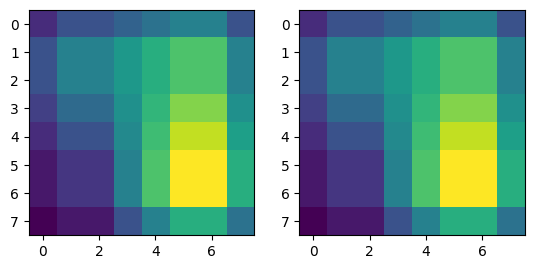

In [5]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2)
ax[0].imshow(torch.matmul(coeff.to_dense(), X.flatten()).reshape((image_size, image_size)))
ax[1].imshow(res.squeeze())

print(torch.allclose(torch.matmul(coeff.to_dense(), X.flatten()).reshape((image_size, image_size)), res.squeeze()))

In [25]:
# test for sparseadj matrix torch.stack
image_size = 8
kernel_size = 5

batch_size = 6

in_channels = 4
out_channels = 5

coeffs = [SparseAdjacency((image_size, image_size), kernel_size=kernel_size) for i in range(in_channels)]

# for c, i in enumerate(coeffs):
#     for j in range(kernel_size):
#         i.blocks[j] += 1 + c

coeff = torch.stack(coeffs, dim=0)
coeff = torch.stack([coeff for i in range(out_channels)], dim=0)

X = torch.ones((batch_size, in_channels, image_size, image_size))


print(coeff.shape, X.shape)

torch.Size([5, 4, 64, 64]) torch.Size([6, 4, 8, 8])


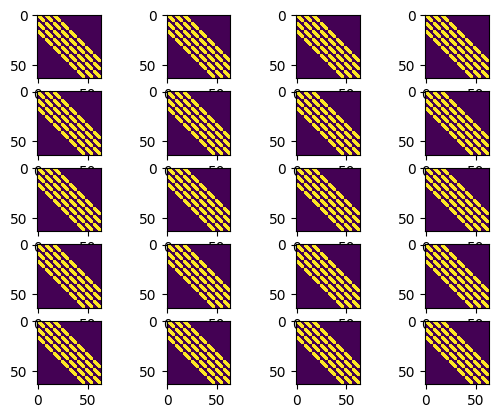

In [26]:
fig, ax = plt.subplots(out_channels, in_channels)
for i in range(out_channels):
    for j in range(in_channels):
        ax[i, j].imshow(coeff[i, j].to_dense())

In [28]:
# batched multi-dim coeff matmul example
res = torch.zeros((out_channels, in_channels, image_size, image_size))

# for b in range(X.shape[0]):
    # for out_c in range(out_channels):

x = X[0]

for i in range(image_size):
    if i < kernel_size//2:
        temp = torch.matmul(coeff[:, :].get_row(i), x[:, :i+kernel_size//2+1].unsqueeze(-1))
    elif i >= image_size - kernel_size//2:
        temp = torch.matmul(coeff[:, :].get_row(i), x[:, i-kernel_size//2:].unsqueeze(-1))
    else:
        temp = torch.matmul(coeff[:, :].get_row(i), x[:, i-kernel_size//2:i+kernel_size//2+1].unsqueeze(-1))
    res[:, :, i] = torch.sum(temp, dim=2).squeeze()

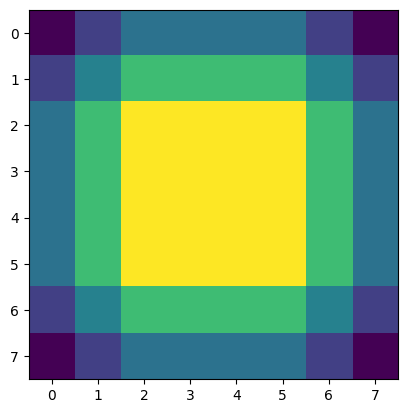

In [29]:
plt.imshow(res[0, 3])

# Testing overriden torch.matmul

In [1]:
import torch
from block_sparse import SparseAdjacency


image_size = 8
kernel_size = 3
in_channels = 4
out_channels = 5
batch_size = 6

X = torch.ones((batch_size, in_channels, image_size, image_size))

adjcoeff = torch.stack([SparseAdjacency((image_size, image_size), kernel_size=kernel_size) for i in range(in_channels)], dim=0)
adjcoeff = torch.stack([adjcoeff for i in range(out_channels)], dim=0)
print(adjcoeff.blocks.shape, X.shape)

torch.Size([5, 4, 3, 8, 8]) torch.Size([6, 4, 8, 8])


In [2]:
a = adjcoeff.matmul(X[0])

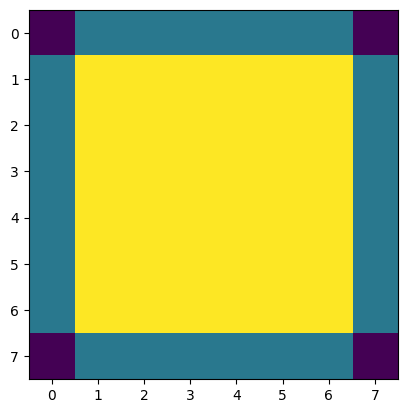

In [5]:
import matplotlib.pyplot as plt


plt.imshow(a[0, 0])

# Comparing three versions of convolution

In [3]:
import torch

image_size = 8
kernel_size = 3

in_channels = 2
out_channels = 3
batch_size = 4

torch.manual_seed(0)
np.random.seed(0)

X = torch.ones((batch_size, in_channels, image_size, image_size))


conv = torch.nn.Conv2d(in_channels, out_channels, kernel_size, bias=True, padding=kernel_size//2)
conv.weight.data = torch.ones_like(conv.weight)
conv.bias.data = torch.zeros_like(conv.bias)
out = conv(X)

In [4]:
conv.weight.shape

torch.Size([3, 2, 3, 3])

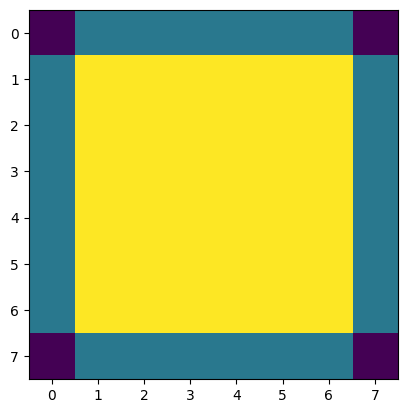

In [7]:
import matplotlib.pyplot as plt

plt.imshow(out[0, 0].detach().numpy())

In [8]:
from gcn.layers import GCLayer
import torch
import numpy as np

image_size = 8
kernel_size = 3

in_channels = 2
out_channels = 3
batch_size = 4

torch.manual_seed(0)
np.random.seed(0)

X = torch.ones((batch_size, in_channels, image_size, image_size))


conv = GCLayer(image_size, in_channels, out_channels, True)
conv.weight.data = torch.ones_like(conv.weight)
conv.kernel.data = torch.ones_like(conv.kernel)
out = conv(X)

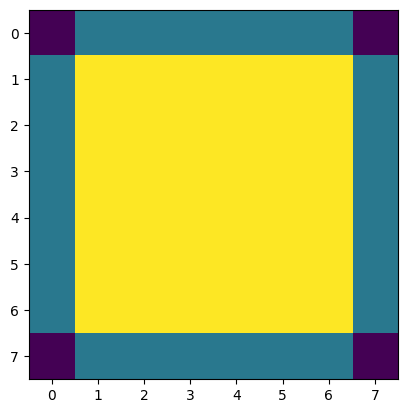

In [12]:
import matplotlib.pyplot as plt


plt.imshow(out[0, 0].detach().numpy())

In [1]:
import torch
import numpy as np
from block_sparse import BlockConv

image_size = 8
kernel_size = 3

in_channels = 1
out_channels = 5
batch_size = 32

torch.manual_seed(0)
np.random.seed(0)

X = torch.ones((batch_size, in_channels, image_size, image_size))

conv = BlockConv(in_channels, out_channels, kernel_size, image_size, False, device='cpu')
conv.kernel.data = torch.ones_like(conv.kernel)
out = conv(X)

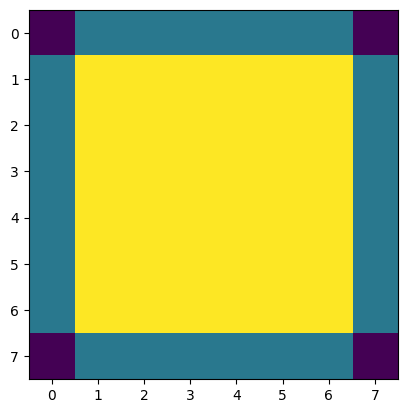

In [2]:
import matplotlib.pyplot as plt


plt.imshow(out[0, 0])

# apply_constraint test ground

In [61]:
image_size = 28
kernel_size = 3
a = torch.rand((kernel_size, kernel_size))
b = torch.zeros((kernel_size, image_size, image_size))

for k in range(kernel_size):
    for i in range(image_size):
        # for j in range(-kernel_size//2+1, kernel_size//2+1):
        if i < kernel_size//2:
            b[k, i, :i+kernel_size//2+1] = a[k][-i+kernel_size//2:]
        elif i >= image_size - kernel_size//2:
            b[k, i, i-kernel_size//2:] = a[k][:image_size-i+kernel_size//2]
        else:
            b[k, i, i-kernel_size//2:i+kernel_size//2+1]= a[k]

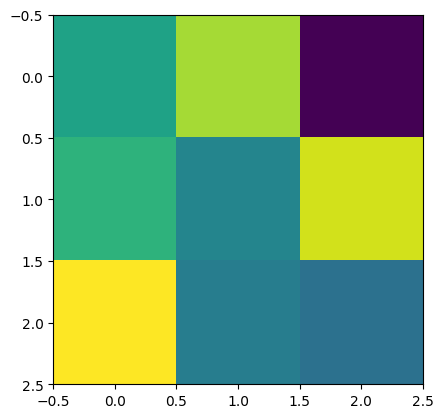

In [62]:
plt.imshow(a)

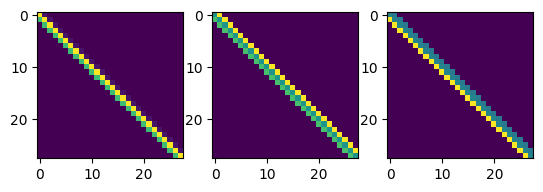

In [63]:
fig, ax = plt.subplots(1, kernel_size)
for i in range(kernel_size):
    ax[i].imshow(b[i])